<h1>Fluorescence Anisotropy Analysis</h1>

## Competition Experiments

An example workflow to determine the dissociation constant of unlabelled peptides (competitors) is presented below. Plese note that the dissociation constant of a fluorescent ligand is needed to complete the analysis. Also, there should be the toatl tracer tracer concentration and total protein concentrations stated in the platemap file.

<h2>Using the package without installation</h2>

To use the package without istallation, download the `Fluorescence-Anisotropy-Analysis` repository from GitHub and extract the folder from ZIP file to desired location.
To start data analysis, create a Jupyter Notebook file in the folder containing the *flu_ani_analysis* source code (*Fluorescence-Anisotropy-Analysis-main* folder in this case) and use the following line to import the flu_ani_analysis package:

In [1]:
from flu_ani_analysis.flu_ani_analysis_module import FA

The raw data import, platemap visualisation, data invalidation, background correction, calcualtion of anisotropy and intensity and their mean values is similar to the protein/tracer titarion workflow and uses the same commands.

<h2>Importing raw data</h2>

You can import the raw data from competition experiemnts in csv format that was exported from Perkin Elmer Envision instruments using the `read_in_envision` function. Reading in the data requires a plate map that contains information about every well.

Data in both plate and list format can be read in using the same function and the number of wells on the plate has to be specified.

In [2]:
comp_data = 'comp_data.csv'                # Note that this will only work if the files are in the same folder
comp_platemap = 'comp_platemap.csv'   # as this Jupyter notebook, alternatively you can provide a full file path

my_data = FA.read_in_envision(data_csv=comp_data, platemap_csv=comp_platemap, data_type='plate', size=384)

Data has been uploaded!

Number of repeats: 1 
Value of g-factor: 1.0 
Overall number of empty cells is 128 in 2 data frames.
Proteins: ['Protein']
Tracers: ['Tracer']
Competitors: ['Competitor 1' 'Competitor 2' 'Competitor 3' 'Competitor 4']


### The platemap

The protein name, tracer name and competitor name are all required to allow for the successful analysis as are their concentrations (in the same units). The Type column specifies whther the well is a control (blank) or a test well.

<h2>Visualising the data for each well</h2>

The imported data is stored as pandas data frames in a nested dictionary. 
You can display the contents of each well (both the imported data and data from platemap) using the `visualise` function. 

The `labelby` argument specifes what is displayed on the well and `colorby` argument controls its color. All the platemap column names such as *Type*, *Contents*, *Protein Name*, *Protein Concentration*, *Tracer Name*, *Tracer Concentration* can be passed as `labelby` and `colorby` arguments. To display the imported data such as *p* and *s* channel intensity, pass a tuple of repeat number and the specified variable, e.g. `labelby=('repeat_1, 'p')`.

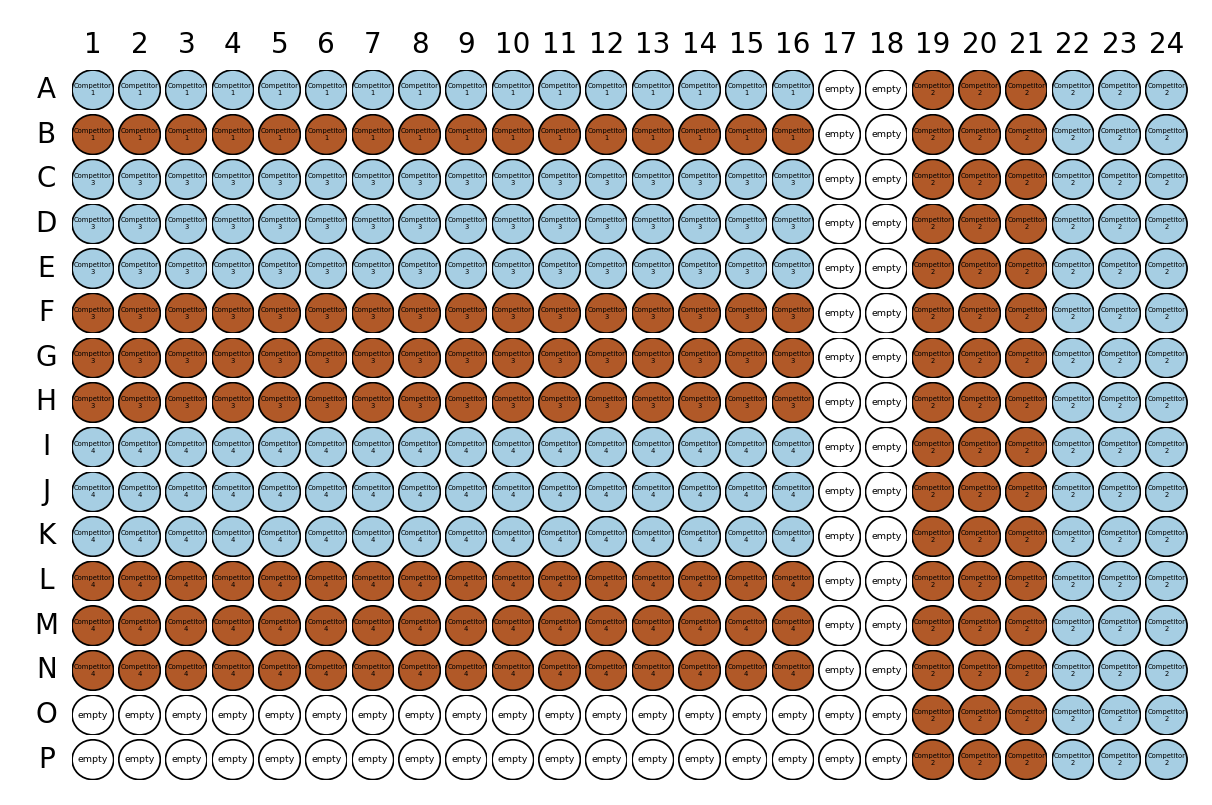

In [4]:
my_data.visualise(labelby='Competitor Name', colorby='Type')

<h2>Background correction</h2>

To calculate the background corrected values for *p* and *s* channel intensity in all repeats use the `background_correct` function.

The backgorund correction is done by subtracting the mean value of blank *p* (or *s*) channel intensity for a given competitor concentration from each non-blank value of the *p* (or *s*) channel intensity for that concentration. 

To display the background corrected values on the platemap use the *p_corrected* or *s_corrected* as a variable along the repeat number in the `visualise` function (e.g. `labelby=('repeat_2', 'p_corrected')`).

Background correction can be performed multiple times on a sigle data set, the existing corrected data will be overwritten.

In [3]:
my_data.background_correct()

Background correction has been successfully performed!


<h2>Anisotropy and intensity calculation</h2>

The `calc_r_i` function calculates the anisotropy and intensity for each well in all repeats using the following formulas:

<p>$I = s + 2gp$</p>

<p>$r = \frac{s - gp}{I}$</p>

<p>Where <em>I</em> is fluorescence intensity, <em>r</em> is anisotropy, <em>g</em> is g factor, <em>p</em> is p channel intensity, <em>s</em> is s channel intensity.</p>
         
If the `correct=False` argument is passed the anisotropy an fluorescence inensity will only be calculated using the raw *p* and *s* channel values and not the background corrected values. The variables for the `visualise` funtion are: *i_raw*, *r_raw*, *i_corrected* and *r_corrected*.

The functinon also calculates the percentage intesity of the non blank well as comapred to the blank corrected wells. By default the plot of the percentage intenstiy against the well ids for all repeats is displayed along with a summary of wells above the threshold (defaults to 80%), however it can be turned off by passing the `plot_i=False` argument.

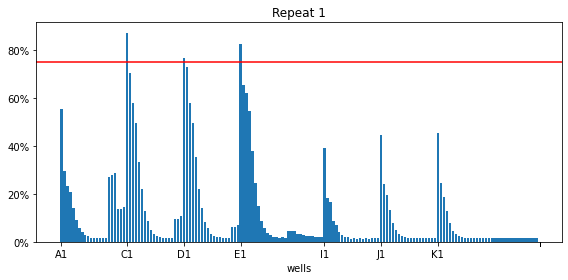

In the following wells the percentage intensity value was above the 75% threshold:
	repeat_1: ['C1', 'D1', 'E1']



In [4]:
my_data.calc_r_i(thr=75)

<h2>Mean anisotropy and intensity calculation</h2>

To calculate the mean anisotropy and intensity along with their standard deviation and standrad error for all replicates for a given competitor concentration use `calc_mean_r_i` function. This data is required for subsequent curve fitting.

In [5]:
my_data.calc_mean_r_i()

<h2>Logistic curve fitting</h2>

The `logistic_fit_com` functinon fits a logistic curve to the plot of anisotropy against competitor concentration using the following formula:

<p>$r = \frac{r_{max} - r_{min}}{1 + \bigl( \frac{p} {IC_{50}} \bigl) ^{hill}} + r_{min}$</p>

<p>Where <em>p</em> is competitor concentration, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy, <em>IC<sub>50</sub></em> is midpoint of transition, <em>hill</em> is the slope.</p>

By default, the curve fitting is done for all competitors in all repeats. However, you can use the `prot`, `trac`, `rep`, `com` and `var` arguments to specify lists of protein, tracer and competitor names and repeats for which the fitting will be performed. For example, to do the fitting only for the *Competitor 2*  and *Competitor 3*, pass `com=['Competitor 2', 'Competitor 3']`.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `logistic_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [6]:
my_data.logisitc_fit_com()

If the curve fitting fails for any competitor, a warning with deatils is provided. In such cases, try repeating the curve fitting for only the failed data passing additional keyword arguments such as `sigma`, `p0`, `bounds`, etc.

You can display the plots of anisotropy against cmpetitor concentration with a fitted logisitc curve for all repeats using the `plot_ani_com` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`).

C:\Program Files (x86)\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


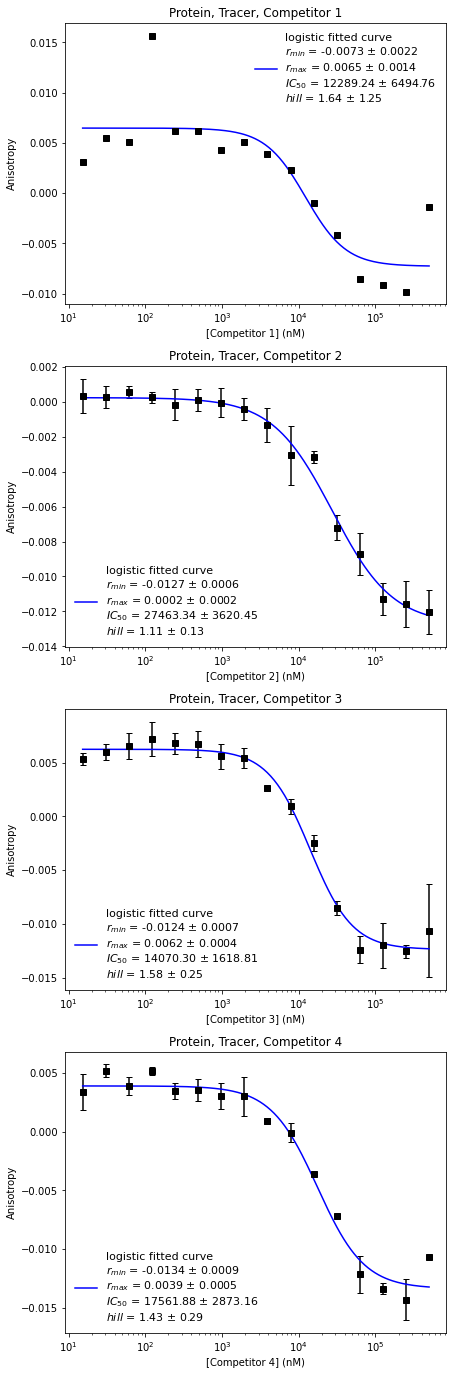

In [7]:
my_data.plot_ani_com()

By default, results for all competitors in all repeats are plotted. You can use the `prot`, `trac`, `com`, and `rep`  arguments to specify lists of protein, tracer and competitor names and repeats for which the data will be plotted.

The resulting fitting parametrs are displayed on the figures and are stired in the `fit_params` data frame in the `data_dict`.

TypeError: 'AxesSubplot' object is not subscriptable

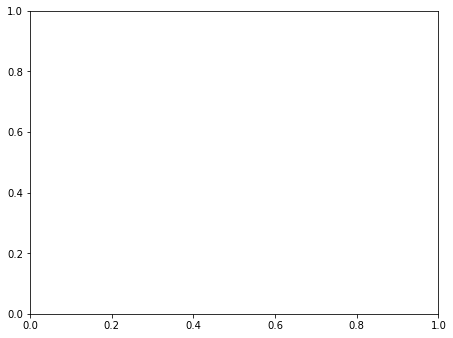

In [11]:
my_data.plot_ani_com(com=['Competitor 2'])

## Importing the fitting parameters from protein/tracer titration

To calcualte the amount of fluorescent trcaer bound to the target protein the limits of anisotropy determined in the protein/tracer titration have to be imported into the `final_fit` data frame. This is done using the `import_params` function which takes in a file path to the csv file containg the required data. This file can be generted using the `export params` function in the protein/tracer ttration notebook and should also contain the binding constant (Kd) since it is needed in later stages. Please note that the protein and tracer names must be the same in the imported data frame as they are in the competitor platemap.

In [8]:
my_data.import_params("final_fit_params.csv")

C:\Users\Bartek\OneDrive\Documents\Programming\Python\MChem-project\test_module\flu_ani_analysis\flu_ani_analysis_module.py:1616: UserWarning: The final_fit data frame does not contain following columns: '['LT', 'LT error']'
  warnings.warn(f"The final_fit data frame does not contain following columns: '{col_diff}'")


In [9]:
my_data.final_fit

rmin  rmin error      rmax  rmax error  \
Protein Tracer Competitor 1 -0.011513    0.000356  0.124883    0.001465   
               Competitor 2 -0.011513    0.000356  0.124883    0.001465   
               Competitor 3 -0.011513    0.000356  0.124883    0.001465   
               Competitor 4 -0.011513    0.000356  0.124883    0.001465   

                             lambda           Kd    Kd error  
Protein Tracer Competitor 1     1.0  8782.305653  238.431649  
               Competitor 2     1.0  8782.305653  238.431649  
               Competitor 3     1.0  8782.305653  238.431649  
               Competitor 4     1.0  8782.305653  238.431649

<h2>Amount of tracer bound calculation</h2>

The `calc_amount_bound` function calculates the amount of fluorescent tracer bound to the protein using the following formula:

$L_{B} = \Bigl( \frac {\lambda(r_{max}-r)} {r-r_{min}} +1 \Bigl) ^{-1} L_{T}$

Where <em>L<sub>B</sub></em> is the concentration of fluorescent tracer bound to the target protein, <em>L<sub>T</sub></em> is the total tracer concentration, <em>&#955;</em> is the difference in quantum yields between bound and free states, <em>r</em> is the anisotropy, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy. 

The mean value of anisotropy for all replicates (if present) for a given competitor concentration is used in this calculation. The standard deviation and standard error are also calculated. 

In [10]:
my_data.calc_amount_bound()

<h2>Sigle site curve fitting</h2>

The `singlesite_fit_com` functinon fits a logistic curve to the plot of amunt bound against competitor concentration using the following formula:

<p>$r = \frac{Max - Min}{1 + \bigl( \frac{p} {IC_{50}} \bigl) ^{hill}} + Min$</p>

<p>Where <em>p</em> is competitor concentration, <em>Max</em> is the upper limit of the amount bound, <em>Min</em> is the lower limit of the amount bound, <em>IC<sub>50</sub></em> is midpoint of transition, <em>hill</em> is the slope.</p>

By default, the curve fitting is done for all competitors in all repeats. However, you can use the `prot`, `trac`, `com`,  and  `rep`  arguments to specify lists of protein, tracer and competitor names and repeats for which the fitting will be performed.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `single_site_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [11]:
my_data.single_site_com()

If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases, try fitting again passing additional arguments such as `sigma`, `p0`, `bounds`, etc.

The resulting fitting parametrs and their errors are displayed can be displayed on the IC50 figures and are stored in the `fit_params_com` data frame in the `data_dict`.

You can display the plots of concentration of fluorescent tracer bound to target protein against the competitor  concentration with a fitted curve using the `plot_ic50` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`). By default, the function plots data for all repeats and competitors on separate figures, however you can use the `rep`, `prot`, `trac` and `com` arguments to pass a list of repeats or proteins names or tracers names for which the plots will be generated similarly to the `plot_ani_com` function. 

## Calculation of the competitor binding constants (Ki)

The `plot_ic50` function also calculates binding constant for each competitor (Ki) and displays it along with the IC50 value on the figures. The following methodology is used t obtain the the binding constants.

the concentration of unbound protein at zero inhibitor (competitor) concentration (p0) is calculated from:

$P_0 = \frac{ -(K_d + L_T - P_T) + \sqrt{ (K_d + L_T - P_T)^2 - 4P_TL_T } }{2}$

Where Kd is the dissociation constnat of the fluorescent tacer, LT is the total tracer concentration (taken from the platemap) and PT is the total protein concentration (taken from the platemap). 

Next, the concentration of unbound fluorescent tracer at the IC50 point (L50) is calculated from:

$L_{50} = L_T - \frac{P_T-P_0}{2} $

Where LT is the total tracer concentration, PT is the total protein concentration and P0 is the concentration of the unbound protein at zero competitor concentration.

The concentration of unbound competitor at the IC50 point (I50) is calculated from:

$I_{50} = IC_{50} - P_T +  \bigl( \frac{P_T - P_0}{2} \bigl) \bigl( 1 + \frac{K_d}{L_{50}} \bigl)$

Where IC50 is determined from the curve fit of competitor titration, PT is the total concentration of protein and Kd is the dissociation constant of fluorescent tracer L50 and P0 is calculated from equation and equation 

The dissociation constant of the unlabelled peptide (competitor) is calculated from:

$K_i = \frac{I_{50}}{ \frac{L_{50}}{K_d} + \frac{P_0}{K_d} + 1 }$

The above procedure calcualtes the Ki based on the total protein concentration stated in the platemap. 

### Calculation of Ki*
There is also another value of Ki calculated (Ki*) based on the total protein concentration calculated from the calculated from the measured anisotropy.

Assuming the single site binding model the binding constant can be expressed as:

$K_d = \frac{[P][L]}{[PL]} = \frac{([P_T]-[PL])([L_T]-[PL])}{[PL]}$

Where, [P] is the protein concentration, [L] is fluorescent tracer concentration, [P_T] is the total protein concentration, [L_T] is the total fluorescent tracer concentration, [PL] is the concentration of the protein-tracer complex.

After rearrangement:

$P_T = \frac{K_dP_L}{L_T - P_L} + P_L$

The concentration of the protein-tracer complex is taken as the upper asymptote of a curve fitted to the plot of concentration of fluorescent tracer bound against the competitor concentration. The total protein concentration (LT) obtained in this way is then used to caclculate the Ki* instead of the LT from the platemap.

### Ki error calculation
The error in Ki and Ki* is obtained using a simulation since it involves the error in the measurement of the Kd of the tracer and the IC50 of the competitor. A series of 100,000 simulations are run with a simulated value of Kd and IC50 generated around the observed mean with the probability of the value occurring based on a normal distribution and standard deviation equal to the fitting error of each value. The simulated value of Ki is then calculated with the error estimated from the standard deviation of the simulated results.

## IC50 plotting

To plot the graphs of the concnetration of fluorescent tracer bound against the competitor concentration with a fiited curve and the calculated dissociation constnts use the `plot_ic50` function. By defult, data for all repeats and competitors is plotted, however you can specifiy the protein, tracer and competitor names for which data is to be plotted using the `prot`, `trac` and `com` arguments. The `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`.

5000.0
1341.336580217673


C:\Program Files (x86)\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


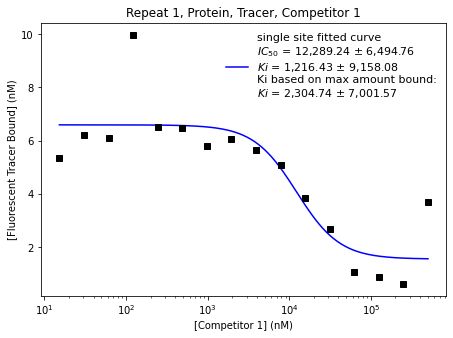

5000.0
832.0853160269054


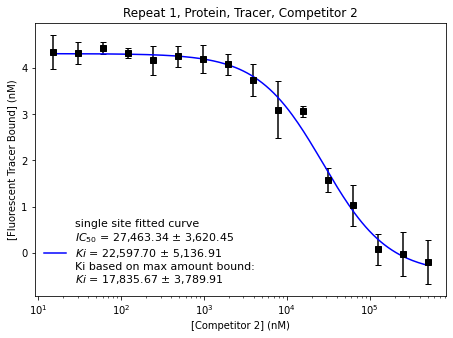

5000.0
1319.7821366397964


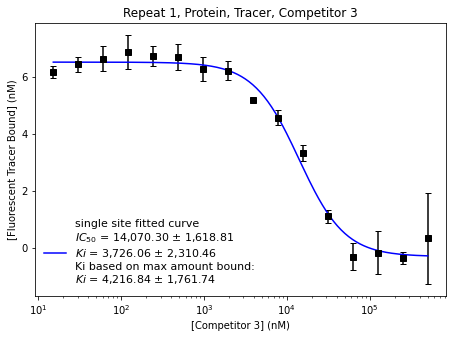

5000.0
1125.4738803060816


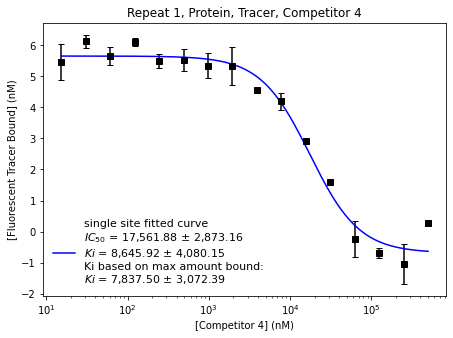

In [12]:
my_data.plot_ic50()

To export the graphs either pass the `export=True` to save them in the same location as this notebook or pass a string with path to preferred directory (e.g. `export="C:\\folder1\\folder2\\"` for Windows OS)

## Exporting the data 

## Exporting the fiting parameters

## Structure of the data dictionary

The structure of the data dictionary is exactly the same as for the protein/tracer titration with the exception that the final_fit data frame contains the imorted fitting parameters from the protein/tracer titration and there is an additional data frame `fit_params_comp` for storing the fitting parameters of the single site curve fitting. This data frame can be accessed in the following way:

In [18]:
my_data.data_dict['repeat_1']['data']['fit_params_comp']

min min error  max max error IC50 IC50 error  \
Protein Tracer Competitor 1  NaN       NaN  NaN       NaN  NaN        NaN   
               Competitor 2  NaN       NaN  NaN       NaN  NaN        NaN   
               Competitor 3  NaN       NaN  NaN       NaN  NaN        NaN   
               Competitor 4  NaN       NaN  NaN       NaN  NaN        NaN   

                            hill hill error  Ki  Ki error  Ki_2  Ki_2 error  
Protein Tracer Competitor 1  NaN        NaN NaN       NaN   NaN         NaN  
               Competitor 2  NaN        NaN NaN       NaN   NaN         NaN  
               Competitor 3  NaN        NaN NaN       NaN   NaN         NaN  
               Competitor 4  NaN        NaN NaN       NaN   NaN         NaN